# Training a Linear Regression Model with Custom Weight Initialization
Study material: https://www.learnpytorch.io/

In [34]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Create and split data

In [35]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [36]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [37]:
def predicitons_plot(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(7, 5))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="k", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, color=(1, 0.5, 0), s=4, label="Predictions")

  plt.legend(prop={"size": 14})

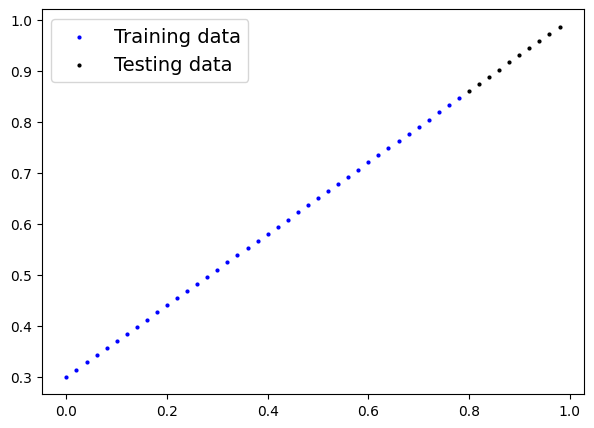

In [38]:
predicitons_plot()

## Build linear model

In [39]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0, model_0.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

## Training

In [40]:
loss_fn = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [41]:
torch.manual_seed(42)  # Set the random seed for reproducibility

epochs = 200  # Define the number of training epochs

for epoch in range(epochs):  # Loop through the number of epochs
    model_0.train()  # Set the model to training mode

    y_pred = model_0(X_train)  # Make predictions on the training data
    loss = loss_fn(y_pred, y_train)  # Compute the training loss

    optimizer.zero_grad()  # Reset gradients to avoid accumulation
    loss.backward()  # Perform backpropagation to compute gradients
    optimizer.step()  # Update model parameters using the optimizer

    model_0.eval()  # Set the model to evaluation mode

    with torch.inference_mode():  # Disable gradient computation for efficiency
        test_pred = model_0(X_test)  # Make predictions on the test data
        test_loss = loss_fn(test_pred, y_test)  # Compute the test loss
    if(epoch % 10 == 0):
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [42]:
print(model_0.state_dict())
print(f"Expected weight: {weight} | Expected bias: {bias}")


OrderedDict([('linear_layer.weight', tensor([[0.6968]])), ('linear_layer.bias', tensor([0.3025]))])
Expected weight: 0.7 | Expected bias: 0.3


## Making and evaluating predictions

In [43]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

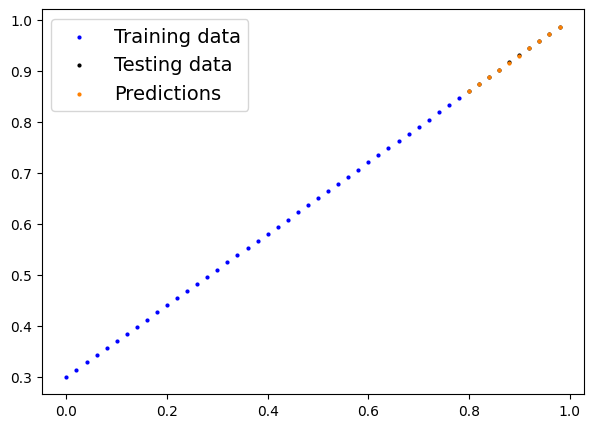

In [44]:
predicitons_plot(predictions=y_preds)

## Saving and loading the model

In [45]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "linear_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [46]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [47]:
loaded_model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [48]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])